# Neural Networks

This notebook shall be based off the following text: \
https://www.3blue1brown.com/topics/neural-networks

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist # type: ignore

2024-05-09 23:49:58.383140: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 23:49:58.386205: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 23:49:58.426346: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 23:49:59.343803: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


---

---

#### Basic Example to Start Forward Propogation

To Begin the Neural Network, we need 4 column vectors (layers):

Input Layer 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(A^{(0)})$ : $784 \times 1$ 

Hidden Layer 0 
&nbsp;$(A^{(1)})$ : $16 \times 1$ 

Hidden Layer 1 
&nbsp;$(A^{(2)})$ : $16 \times 1$ 

Output Layer 
&nbsp;&nbsp;&nbsp;$(A^{(3)})$ : $10 \times 1$ 

The Input Layer will be randomized for now, but will actually be taken from the MNIST training set

In [2]:
input_layer   = np.random.randn(784, 1)
hidden_layer0 = np.random.randn(16, 1)
hidden_layer1 = np.random.randn(16, 1)
output_layer  = np.random.randn(10, 1)

Now, we need 3 weight vectors

Weight 0 ($W^{(0)}$) : Height(HiddenLayer0) $\times$ Height(InputLayer)

Weight 1 ($W^{(1)}$) : Height(HiddenLayer1) $\times$ Height(HiddenLayer0)

Weight 2 ($W^{(2)}$) : Height(OutputLayer) $\times$ Height(HiddenLayer1)


In [3]:
weight0 = np.random.randn(len(hidden_layer0), len(input_layer))
weight1 = np.random.randn(len(hidden_layer1), len(hidden_layer0))
weight2 = np.random.randn(len(output_layer), len(hidden_layer1))

We also need 3 column vectors (biases)

Bias 0 ($B^{(0)}$)  : Height(HiddenLayer0) $\times$ 1

Bias 1 ($B^{(1)}$)  : Height(HiddenLayer1) $\times$ 1

Bias 2 ($B^{(2)}$)  : Height(OutputLayer) $\times$ 1

In [4]:
bias0 = np.random.randn(len(hidden_layer0), 1)
bias1 = np.random.randn(len(hidden_layer1), 1)
bias2 = np.random.randn(len(output_layer), 1)

We now also need a normalization function:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Now we can calculate the actual values of the hidden layers and output layer given the input layer, weights, and biases

Notice the example where we use the InputLayer, Weight0, Bias0

$$
\begin{align*}
A^{(1)} = \sigma(W^{(0)} \times A^{(0)} + B^{(0)}) &= 
\sigma\left(
\begin{bmatrix}
    w_{0,0}^{(0)}  & w_{0,1}^{(0)}  & \cdots & w_{0, 784}^{(0)}  \\
    w_{1,0}^{(0)}  & w_{1,1}^{(0)}  & \cdots & w_{1, 784}^{(0)}  \\
    \vdots         & \vdots         & \vdots & \vdots     \\ 
    w_{15,0}^{(0)} & w_{15,1}^{(0)} & \cdots & w_{15, 784}^{(0)}
\end{bmatrix}
\begin{bmatrix}
    a_0^{(0)}   \\
    a_1^{(0)}   \\
    \vdots \\
    a_{784}^{(0)}
\end{bmatrix}
+
\begin{bmatrix}
    b_0^{(0)}    \\
    b_1^{(0)}    \\
    \vdots \\
    b_{15}^{(0)}
\end{bmatrix}
\right) \\
&= \begin{bmatrix}
    \sigma(w_{0,0}^{(0)}a_0^{(0)} + w_{0,15}^{(0)}a_1^{(0)} + \cdots + w_{0, 784}^{(0)}a_{784}^{(0)} + b_0^{(0)}) \\
    \sigma(w_{1,0}^{(0)}a_0^{(0)} + w_{1,1}^{(0)}a_1^{(0)} + \cdots + w_{1, 784}^{(0)}a_{784}^{(0)} + b_1^{(0)}) \\
    \vdots \\
    \sigma(w_{15,0}^{(0)}a_0^{(0)} + w_{15,1}^{(0)}a_1^{(0)} + \cdots + w_{15, 784}^{(0)}a_{784}^{(0)} + b_{15}^{(0)}) \\
\end{bmatrix}
\end{align*}
$$



In [6]:
def calcNextLayer(weight, layer, bias):
    return sigmoid(np.matmul(weight, layer) + bias)

In [7]:
hidden_layer0 = calcNextLayer(weight0, input_layer, bias0)
hidden_layer1 = calcNextLayer(weight1, hidden_layer1, bias1)
output_layer = calcNextLayer(weight2, hidden_layer1, bias2)
print(hidden_layer0.T)
print(hidden_layer1.T)
print(output_layer.T)

[[3.83570825e-02 9.99999646e-01 1.00000000e+00 9.99994812e-01
  1.00000000e+00 1.88803334e-15 9.99999916e-01 4.89952560e-01
  6.48484173e-19 1.00000000e+00 1.00000000e+00 8.29118034e-11
  3.07131390e-16 1.00000000e+00 1.00000000e+00 9.80103460e-01]]
[[4.94558071e-02 9.96971276e-01 9.94882262e-01 9.95889865e-01
  1.31709027e-02 2.19295117e-01 5.20700554e-02 9.99654280e-01
  4.42561952e-01 6.43346575e-01 1.81616050e-01 3.21769063e-01
  7.19214165e-01 9.82367345e-01 2.03719562e-04 5.57264921e-02]]
[[0.76175113 0.36470442 0.71813024 0.10302062 0.03342142 0.0225406
  0.41032814 0.74343746 0.98685149 0.88002526]]


---

---

#### Forward Propogation

Now we can start to hold all layers in the array $A$, all the weights in $W$, and all the biases in $B$

In [8]:
# Let heights be an array that holds the heights of the input_layer, all hidden_layers, and output_layer

def generate_A_W_B(heights: list):
    A = []
    for height in heights:
        A.append(np.random.randn(height, 1))

    W = []
    for i in range(1, len(heights)):
        W.append(np.random.randn(heights[i], heights[i - 1]))

    B = []
    for i in range(1, len(heights)):
        B.append(np.random.randn(heights[i], 1))

    return A, W, B

Now we can find the actual values of the hidden_layers and output_layers, using the array version of $A$, $W$, and $B$

In [9]:
def forward_propogation(A, W, B):
    for i in range(1, len(A)):
        A[i] = calcNextLayer(W[i - 1], A[i - 1], B[i - 1])
    return A

In [10]:
heights = [(28 * 28), 16, 16, 10]
A, W, B = generate_A_W_B(heights)
A = forward_propogation(A, W, B)
print(A[1].T)
print(A[2].T)
print(A[3].T)


[[8.18674178e-10 9.99999795e-01 9.99999677e-01 7.68514973e-08
  9.99999758e-01 7.06545311e-24 1.00000000e+00 9.99742590e-01
  9.84145502e-01 9.99830447e-01 9.60857653e-03 1.00000000e+00
  9.17815523e-10 1.37373957e-06 1.83526740e-01 1.00000000e+00]]
[[0.02600493 0.82594384 0.99014957 0.80255838 0.12022421 0.79553801
  0.88750339 0.74258409 0.69325091 0.57242991 0.18616159 0.0476971
  0.21523186 0.75162949 0.135244   0.07107132]]
[[0.94714232 0.66779904 0.52593028 0.8820985  0.02062268 0.26316127
  0.07106244 0.99381022 0.38158664 0.84296775]]


---

---

#### MNIST Forward Propogation

We will now test the Forward Propogation using the MNist Training Set

In [11]:
def setInputLayer(A, image):
    A[0] = image.reshape(-1, 1)
    return A

In [12]:
def convertAnswer(answer: int):
    y = np.zeros((10, 1))
    y[answer] = 1
    return y

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
index = 5
heights = [(28 * 28), 16, 16, 10]
A, W, B = generate_A_W_B(heights)
A = setInputLayer(A, X_train[index])
A = forward_propogation(A, W, B)
y = convertAnswer(y_train[index])
print(A[1].T)
print(A[2].T)
print(A[3].T)

[[6.16593480e-279 0.00000000e+000 1.35670091e-245 0.00000000e+000
  1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000 0.00000000e+000 1.00000000e+000 2.11656875e-228
  1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000]]
[[2.86506095e-01 2.70508148e-01 8.49495951e-01 1.71160234e-01
  3.38567050e-01 8.67720340e-01 9.66280101e-01 1.33704953e-01
  3.13371627e-01 7.95272806e-01 9.97695154e-01 7.64922382e-02
  1.88361218e-02 3.05432403e-01 9.75223019e-01 5.84270178e-04]]
[[0.02552583 0.02302553 0.96907745 0.89847521 0.03250674 0.28918229
  0.05499001 0.78689482 0.11787143 0.11944126]]


/tmp/ipykernel_1031/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


---

---

#### Minimizing the Cost Function - Calculus

<center>
    <img src="https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/backpropagation-calculus/index-by-j-k.png" width=25%></img>
</center>  

The cost is going to be the sum of the squared differences between the output layer and the actual answer.  This will show us how we need to adjust the weights and biases.
$$
C = \sum\limits_{j = 0}^{9} (a_j^{(3)} - y_j)^2
$$
where $y$ is the correct_answer_vector

We can notate the following.

- $j$ is the index of the "to" layer
- $k$ is the index of the "from" layer
- $w_{j,k}$ is the weight that goes from $A_k$ to $A_j$
- $L$ represents the index of the "to" layer

In [15]:
def cost(A, y):
    return np.sum(np.square(A[-1] - y))

Notice the following work to find the derivative of our sigmoid function:

$$
\sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \frac{1}{1 + e^{-x}}\left(\frac{e^{-x}}{1 + e^{-x}}\right) = \frac{1}{1 + e^{-x}}\left(\frac{1 + e^{-x}}{1 + e^{-x}} - \frac{1}{1 + e^{-x}}\right) = \sigma(x)(1 - \sigma(x))
$$

In [16]:
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

---

We can find the change in C in respect to w and b -> 1 layer back

We can find the change in C in respect to each change in $w_{0,0}^{(2)}$ with the following:

$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\
\frac{\partial C}{\partial w_{0,0}^{(2)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\frac{\partial a_{0}^{(3)}}{\partial w_{0,0}^{(2)}} \\
&= 2(a_0^{(3)} - y_0)\sigma'(W_0^{(2)} \times A^{(2)} + b_0^{(2)}) a_{0}^{(2)}
\end{align*}
$$

Once more but for $w_{0,15}^{(2)}$:
$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\
\frac{\partial C}{\partial w_{0,15}^{(2)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\frac{\partial a_{0}^{(3)}}{\partial w_{0,15}^{(2)}} \\
&= 2(a_0^{(3)} - y_0)\sigma'(W_0^{(2)} \times A^{(2)} + b_0^{(2)}) a_{15}^{(2)}
\end{align*}
$$

Once more but for $w_{9,0}^{(2)}$:
$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{9}^{(3)} = \sigma(w_{9,0}^{(2)}a_{0}^{(2)} + \cdots + w_{9,15}^{(2)}a_{15}^{(2)} + b_{9}^{(2)}) \\
\frac{\partial C}{\partial w_{9,0}^{(2)}} &= \frac{\partial C}{\partial a_{9}^{(3)}}\frac{\partial a_{9}^{(3)}}{\partial w_{9,0}^{(2)}} \\
&= 2(a_9^{(3)} - y_9)\sigma'(W_9^{(2)} \times A^{(2)} + b_9^{(2)}) a_{0}^{(2)}
\end{align*}
$$

Notice we can find the change in C in respect to each change in w and b -> 1 layer back with the following:
$$
\begin{align*}
\frac{\partial C}{\partial w_{j,k}^{(2)}} &= \frac{\partial C}{\partial a_{j}^{(3)}}\frac{\partial a_{j}^{(3)}}{\partial w_{j,k}^{(2)}} = 2(a_j^{(3)} - y_j)\sigma'(W_j^{(2)} \times A^{(2)} + b_j^{(2)}) a_{k}^{(2)} \\
\frac{\partial C}{\partial b_{j}^{(2)}} &= \frac{\partial C}{\partial a_{j}^{(3)}}\frac{\partial a_{j}^{(3)}}{\partial b_{j}^{(2)}} = 2(a_j^{(3)} - y_j)\sigma'(W_j^{(2)} \times A^{(2)} + b_j^{(2)})
\end{align*}
$$

Notice the following for $\frac{\partial C}{\partial W^{(2)}}$:
$$
\begin{align*}
\frac{\partial C}{\partial W^{(2)}} &= 
\begin{bmatrix}
    2(a_0^{(3)} - y_0)\sigma'(W_0^{(2)} \times A^{(2)} + b_0^{(2)}) a_{0}^{(2)} & \cdots & 2(a_0^{(3)} - y_0)\sigma'(W_0^{(2)} \times A^{(2)} + b_0^{(2)}) a_{15}^{(2)}\\
    \vdots & \ddots & \vdots \\
    2(a_9^{(3)} - y_9)\sigma'(W_9^{(2)} \times A^{(2)} + b_9^{(2)}) a_{0}^{(2)} & \cdots & 2(a_9^{(3)} - y_9)\sigma'(W_9^{(2)} \times A^{(2)} + b_9^{(2)}) a_{15}^{(2)}
\end{bmatrix} \\
&= \boldsymbol{\left(2 (A^{(3)} - y) *
\sigma' (W^{(2)} \times A^{(2)} + B^{(2)})\right) \times (A^{(2)})^{T}} \\
&= \bigg(\{C\} * \big(\{10 \times 1\} - \{10 \times 1\}\big) * \{10 \times 1\}\bigg) \times \{1 \times 16\} \\
&= \bigg(\{C\} * \{10 \times 1\} * \{10 \times 1\}\bigg) \times \{1 \times 16\} \\
&= \{10 \times 1\} \times \{1 \times 16\} \\
&= \{10 \times 16\} 
\end{align*}
$$
where $*$ represents "element-wise multiplication"

---

Now, lets dive into going back 2 layers this time:

We can find the change in C in respect to each change in $w_{0,0}^{(1)}$ with the following:

$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + (a_{1}^{(3)} - y_{1})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\ 
&\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(3)} = \sigma(w_{1,0}^{(2)}a_{0}^{(2)} + \cdots + w_{1,15}^{(2)}a_{15}^{(2)} + b_{1}^{(2)}) \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{9}^{(3)} = \sigma(w_{9,0}^{(2)}a_{0}^{(2)} + \cdots + w_{9,15}^{(2)}a_{15}^{(2)} + b_{9}^{(2)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(2)} = \sigma(w_{0,0}^{(1)}a_{0}^{(1)} + \cdots + w_{0,15}^{(1)}a_{15}^{(1)} + b_{0}^{(1)}) \\
\frac{\partial C}{\partial w_{0,0}^{(1)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\frac{\partial a_{0}^{(3)}}{\partial a_{0}^{(2)}}\frac{\partial a_{0}^{(2)}}{\partial w_{0,0}^{(1)}} + \frac{\partial C}{\partial a_{1}^{(3)}}\frac{\partial a_{1}^{(3)}}{\partial a_{0}^{(2)}}\frac{\partial a_{0}^{(2)}}{\partial w_{0,0}^{(1)}} + \cdots + \frac{\partial C}{\partial a_{9}^{(3)}}\frac{\partial a_{9}^{(3)}}{\partial a_{0}^{(2)}}\frac{\partial a_{0}^{(2)}}{\partial w_{0,0}^{(1)}} \\
&= 2(a_0^{(3)} - y_0)\sigma'(W_0^{(2)} \times A^{(2)} + b_0^{(2)})w_{0,0}^{(2)}\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{0}^{(1)} \\
&+ 2(a_1^{(3)} - y_1)\sigma'(W_1^{(2)} \times A^{(2)} + b_1^{(2)})w_{1,0}^{(2)}\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{0}^{(1)} \\
&\qquad\qquad\qquad\qquad\vdots \\
&+  2(a_9^{(3)} - y_9)\sigma'(W_9^{(2)} \times A^{(2)} + b_9^{(2)})w_{9,0}^{(2)}\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{0}^{(1)} \\
&= 2\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{0}^{(1)}\bigg(\sum\limits_{n = 0}^{9}(a_n^{(3)} - y_n)\sigma'(W_n^{(2)} \times A^{(2)} + b_n^{(2)})w_{n,0}^{(2)}\bigg)
\end{align*}
$$

Once more but for $w_{0,15}^{(1)}$:

$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + (a_{1}^{(3)} - y_{1})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(3)} = \sigma(w_{1,0}^{(2)}a_{0}^{(2)} + \cdots + w_{1,15}^{(2)}a_{15}^{(2)} + b_{1}^{(2)}) \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{9}^{(3)} = \sigma(w_{9,0}^{(2)}a_{0}^{(2)} + \cdots + w_{9,15}^{(2)}a_{15}^{(2)} + b_{9}^{(2)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(2)} = \sigma(w_{0,0}^{(1)}a_{0}^{(1)} + \cdots + w_{0,15}^{(1)}a_{15}^{(1)} + b_{0}^{(1)}) \\
\frac{\partial C}{\partial w_{0,15}^{(1)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\frac{\partial a_{0}^{(3)}}{\partial a_{0}^{(2)}}\frac{\partial a_{0}^{(2)}}{\partial w_{0,15}^{(1)}} + \frac{\partial C}{\partial a_{1}^{(3)}}\frac{\partial a_{1}^{(3)}}{\partial a_{0}^{(2)}}\frac{\partial a_{0}^{(2)}}{\partial w_{0,15}^{(1)}} + \cdots + \frac{\partial C}{\partial a_{9}^{(3)}}\frac{\partial a_{9}^{(3)}}{\partial a_{0}^{(2)}}\frac{\partial a_{0}^{(2)}}{\partial w_{0,15}^{(1)}} \\
&= 2(a_0^{(3)} - y_0)\sigma'(W_0^{(2)} \times A^{(2)} + b_0^{(2)})w_{0,0}^{(2)}\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{15}^{(1)} \\
&+ 2(a_1^{(3)} - y_1)\sigma'(W_1^{(2)} \times A^{(2)} + b_1^{(2)})w_{1,0}^{(2)}\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{15}^{(1)} \\
&\qquad\qquad\qquad\qquad\vdots \\
&+  2(a_9^{(3)} - y_9)\sigma'(W_9^{(2)} \times A^{(2)} + b_9^{(2)})w_{9,0}^{(2)}\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{15}^{(1)} \\
&= 2\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{15}^{(1)}\bigg(\sum\limits_{n = 0}^{9}(a_n^{(3)} - y_n)\sigma'(W_n^{(2)} \times A^{(2)} + b_n^{(2)})w_{n,0}^{(2)}\bigg)
\end{align*}
$$

Once more but for $w_{15,0}^{(1)}$:

$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + (a_{1}^{(3)} - y_{1})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(3)} = \sigma(w_{1,0}^{(2)}a_{0}^{(2)} + \cdots + w_{1,15}^{(2)}a_{15}^{(2)} + b_{1}^{(2)}) \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{9}^{(3)} = \sigma(w_{9,0}^{(2)}a_{0}^{(2)} + \cdots + w_{9,15}^{(2)}a_{15}^{(2)} + b_{9}^{(2)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{15}^{(2)} = \sigma(w_{15,0}^{(1)}a_{0}^{(1)} + \cdots + w_{15,15}^{(1)}a_{15}^{(1)} + b_{15}^{(1)}) \\
\frac{\partial C}{\partial w_{15,0}^{(1)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\frac{\partial a_{0}^{(3)}}{\partial a_{15}^{(2)}}\frac{\partial a_{15}^{(2)}}{\partial w_{15,0}^{(1)}} + \frac{\partial C}{\partial a_{1}^{(3)}}\frac{\partial a_{1}^{(3)}}{\partial a_{15}^{(2)}}\frac{\partial a_{15}^{(2)}}{\partial w_{15,0}^{(1)}} + \cdots + \frac{\partial C}{\partial a_{9}^{(3)}}\frac{\partial a_{9}^{(3)}}{\partial a_{15}^{(2)}}\frac{\partial a_{15}^{(2)}}{\partial w_{15,0}^{(1)}} \\
&= 2(a_0^{(3)} - y_0)\sigma'(W_0^{(2)} \times A^{(2)} + b_0^{(2)})w_{0,15}^{(2)}\sigma'(W_{15}^{(1)} \times A^{(1)} + b_{15}^{(1)})a_{0}^{(1)} \\
&+ 2(a_1^{(3)} - y_1)\sigma'(W_1^{(2)} \times A^{(2)} + b_1^{(2)})w_{1,15}^{(2)}\sigma'(W_{15}^{(1)} \times A^{(1)} + b_{15}^{(1)})a_{0}^{(1)} \\
&\qquad\qquad\qquad\qquad\vdots \\
&+  2(a_9^{(3)} - y_9)\sigma'(W_9^{(2)} \times A^{(2)} + b_9^{(2)})w_{9,15}^{(2)}\sigma'(W_{15}^{(1)} \times A^{(1)} + b_{15}^{(1)})a_{0}^{(1)} \\
&= 2\sigma'(W_{15}^{(1)} \times A^{(1)} + b_{15}^{(1)})a_{0}^{(1)}\bigg(\sum\limits_{n = 0}^{9}(a_n^{(3)} - y_n)\sigma'(W_n^{(2)} \times A^{(2)} + b_n^{(2)})w_{n,15}^{(2)}\bigg)
\end{align*}
$$

Notice we can find the change in C in respect to each change in w and b -> 2 layer back with the following:

$$
\begin{align*}
\frac{\partial C}{\partial w_{j,k}^{(1)}} &= \frac{\partial a_{j}^{(2)}}{\partial w_{j,k}^{(1)}} \bigg(\sum\limits_{n = 0}^{9} \frac{\partial C}{\partial a_{n}^{(3)}} \frac{\partial a_{n}^{(3)}}{\partial a_{j}^{(2)}}\bigg) = 2\sigma'(W_{j}^{(1)} \times A^{(1)} \times b_{j}^{(1)})a_{k}^{(1)}\left(\sum\limits_{n = 0}^{9} (a_{n}^{(3)} - y_{n})\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})w_{n,j}^{(2)}\right)\\ 
\frac{\partial C}{\partial b_{j}^{(1)}} &= \frac{\partial a_{j}^{(2)}}{\partial b_{j}^{(1)}} \bigg(\sum\limits_{n = 0}^{9} \frac{\partial C}{\partial a_{n}^{(3)}} \frac{\partial a_{n}^{(3)}}{\partial a_{j}^{(2)}}\bigg) = 2\sigma'(W_{j}^{(1)} \times A^{(1)} \times b_{j}^{(1)})\left(\sum\limits_{n = 0}^{9} (a_{n}^{(3)} - y_{n})\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})w_{n,j}^{(2)}\right)
\end{align*}
$$

Notice the following for $\frac{\partial C}{\partial W^{(1)}}$:
$$
\begin{align*}
\frac{\partial C}{\partial W^{(1)}} &= 
\begin{bmatrix}
    2\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{0}^{(1)}\bigg(\sum\limits_{n = 0}^{9}(a_n^{(3)} - y_n)\sigma'(W_n^{(2)} \times A^{(2)} + b_n^{(2)})w_{n,0}^{(2)}\bigg)  \\
    \qquad\qquad \cdots 2\sigma'(W_0^{(1)} \times A^{(1)} + b_0^{(1)})a_{15}^{(1)}\bigg(\sum\limits_{n = 0}^{9}(a_n^{(3)} - y_n)\sigma'(W_n^{(2)} \times A^{(2)} + b_n^{(2)})w_{n,0}^{(2)}\bigg) \\
    \vdots \\
    2\sigma'(W_{15}^{(1)} \times A^{(1)} + b_{15}^{(1)})a_{0}^{(1)}\bigg(\sum\limits_{n = 0}^{9}(a_n^{(3)} - y_n)\sigma'(W_n^{(2)} \times A^{(2)} + b_n^{(2)})w_{n,15}^{(2)}\bigg) \\
    \qquad\qquad \cdots 2\sigma'(W_{15}^{(1)} \times A^{(1)} + b_{15}^{(1)})a_{15}^{(1)}\bigg(\sum\limits_{n = 0}^{9}(a_n^{(3)} - y_n)\sigma'(W_n^{(2)} \times A^{(2)} + b_n^{(2)})w_{n,15}^{(2)}\bigg)
\end{bmatrix} \\
&= \boldsymbol{\left(2\sigma' (W^{(1)} \times A^{(1)} + B^{(1)}) * 
\sum\limits_{n = 0}^{9} (a_{n}^{(3)} - y_n) * \sigma'(W_n^{2} \times A^{(2)} + b_{n}^{(2)}) * (W_n^{(2)})^T
\right) \times (A^{(1)})^{T}} \\
&= \bigg(\{C\} * \{16 \times 1\} * \{C\} * \{C\} * \{16 \times 1\} \bigg)\times \{1 \times 16\} \\
&= \{16 \times 1\} \times \{1 \times 16\} \\
&= \{16 \times 16\} 
\end{align*}
$$
where $*$ represents "element-wise multiplication"

---

Now, lets dive into going back 3 layers this time:

We can find the change in C in respect to each change in $w_{0,0}^{(0)}$ with the following:

$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + (a_{1}^{(3)} - y_{1})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\ 
&\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(3)} = \sigma(w_{1,0}^{(2)}a_{0}^{(2)} + \cdots + w_{1,15}^{(2)}a_{15}^{(2)} + b_{1}^{(2)}) \\ 
&\qquad \xrightarrow[\text{}]{\text{with}} a_{9}^{(3)} = \sigma(w_{9,0}^{(2)}a_{0}^{(2)} + \cdots + w_{9,15}^{(2)}a_{15}^{(2)} + b_{9}^{(2)}) \\ 
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(2)} = \sigma(w_{0,0}^{(1)}a_{0}^{(1)} + \cdots + w_{0,15}^{(1)}a_{15}^{(1)} + b_{0}^{(1)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(2)} = \sigma(w_{1,0}^{(1)}a_{0}^{(1)} + \cdots + w_{1,15}^{(1)}a_{15}^{(1)} + b_{1}^{(1)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{15}^{(2)} = \sigma(w_{15,0}^{(1)}a_{0}^{(1)} + \cdots + w_{15,15}^{(1)}a_{15}^{(1)} + b_{15}^{(1)}) \\
&\qquad\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(1)} = \sigma(w_{0,0}^{(0)}a_{0}^{(0)} + w_{0,1}^{(0)}a_{1}^{(0)} + \cdots + w_{0,784}^{(0)}a_{784}^{(0)} + b_{0}^{(0)}) \\
\frac{\partial C}{\partial w_{0,0}^{(0)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{0}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,0}^{(0)}}\right) + \frac{\partial C}{\partial a_{1}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{1}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,0}^{(0)}}\right) + \cdots + \frac{\partial C}{\partial a_{9}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{9}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,0}^{(0)}}\right) \\
&= \sum\limits_{n = 0}^{9} \left(\frac{\partial C}{\partial a_{n}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{n}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,0}^{(0)}}\right)\right) \\
&= \sum\limits_{n = 0}^{9} \left(2(a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})w_{n, m}^{(2)}\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{m, 0}^{(1)}\sigma'(W_{0}^{(0)} \times A^{(0)} + b_{0}^{(0)})a_{0}^{(0)}\right)\right)\right) \\
&= 2\sigma'(W_{0}^{(0)} \times A^{(0)} + b_{0}^{(0)})a_{0}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, 0}^{(1)}\right)\right)\right)
\end{align*}
$$

We can find the change in C in respect to each change in $w_{0,784}^{(0)}$ with the following:

$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + (a_{1}^{(3)} - y_{1})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\ 
&\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(3)} = \sigma(w_{1,0}^{(2)}a_{0}^{(2)} + \cdots + w_{1,15}^{(2)}a_{15}^{(2)} + b_{1}^{(2)}) \\ 
&\qquad \xrightarrow[\text{}]{\text{with}} a_{9}^{(3)} = \sigma(w_{9,0}^{(2)}a_{0}^{(2)} + \cdots + w_{9,15}^{(2)}a_{15}^{(2)} + b_{9}^{(2)}) \\ 
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(2)} = \sigma(w_{0,0}^{(1)}a_{0}^{(1)} + \cdots + w_{0,15}^{(1)}a_{15}^{(1)} + b_{0}^{(1)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(2)} = \sigma(w_{1,0}^{(1)}a_{0}^{(1)} + \cdots + w_{1,15}^{(1)}a_{15}^{(1)} + b_{1}^{(1)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{15}^{(2)} = \sigma(w_{15,0}^{(1)}a_{0}^{(1)} + \cdots + w_{15,15}^{(1)}a_{15}^{(1)} + b_{15}^{(1)}) \\
&\qquad\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(1)} = \sigma(w_{0,0}^{(0)}a_{0}^{(0)} + w_{0,1}^{(0)}a_{1}^{(0)} + \cdots + w_{0,784}^{(0)}a_{784}^{(0)} + b_{0}^{(0)}) \\
\frac{\partial C}{\partial w_{0,784}^{(0)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{0}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,784}^{(0)}}\right) + \frac{\partial C}{\partial a_{1}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{1}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,784}^{(0)}}\right) + \cdots + \frac{\partial C}{\partial a_{9}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{9}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,784}^{(0)}}\right) \\
&= \sum\limits_{n = 0}^{9} \left(\frac{\partial C}{\partial a_{n}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{n}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{0}^{(1)}}\frac{\partial a_{0}^{(1)}}{\partial w_{0,784}^{(0)}}\right)\right) \\
&= \sum\limits_{n = 0}^{9} \left(2(a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})w_{n, m}^{(2)}\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{m, 0}^{(1)}\sigma'(W_{0}^{(0)} \times A^{(0)} + b_{0}^{(0)})a_{784}^{(0)}\right)\right)\right) \\
&= 2\sigma'(W_{0}^{(0)} \times A^{(0)} + b_{0}^{(0)})a_{784}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, 0}^{(1)}\right)\right)\right)
\end{align*}
$$

We can find the change in C in respect to each change in $w_{15,0}^{(0)}$ with the following:

$$
\begin{align*}
C &= (a_{0}^{(3)} - y_{0})^2 + (a_{1}^{(3)} - y_{1})^2 + \cdots + (a_{9}^{(3)} - y_{9})^2 \\
&\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(3)} = \sigma(w_{0,0}^{(2)}a_{0}^{(2)} + \cdots + w_{0,15}^{(2)}a_{15}^{(2)} + b_{0}^{(2)}) \\ 
&\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(3)} = \sigma(w_{1,0}^{(2)}a_{0}^{(2)} + \cdots + w_{1,15}^{(2)}a_{15}^{(2)} + b_{1}^{(2)}) \\ 
&\qquad \xrightarrow[\text{}]{\text{with}} a_{9}^{(3)} = \sigma(w_{9,0}^{(2)}a_{0}^{(2)} + \cdots + w_{9,15}^{(2)}a_{15}^{(2)} + b_{9}^{(2)}) \\ 
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{0}^{(2)} = \sigma(w_{0,0}^{(1)}a_{0}^{(1)} + \cdots + w_{0,15}^{(1)}a_{15}^{(1)} + b_{0}^{(1)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{1}^{(2)} = \sigma(w_{1,0}^{(1)}a_{0}^{(1)} + \cdots + w_{1,15}^{(1)}a_{15}^{(1)} + b_{1}^{(1)}) \\
&\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{15}^{(2)} = \sigma(w_{15,0}^{(1)}a_{0}^{(1)} + \cdots + w_{15,15}^{(1)}a_{15}^{(1)} + b_{15}^{(1)}) \\
&\qquad\qquad\qquad \xrightarrow[\text{}]{\text{with}} a_{15}^{(1)} = \sigma(w_{15,0}^{(0)}a_{0}^{(0)} + w_{15,1}^{(0)}a_{1}^{(0)} + \cdots + w_{15,784}^{(0)}a_{784}^{(0)} + b_{15}^{(0)}) \\
\frac{\partial C}{\partial w_{15,0}^{(0)}} &= \frac{\partial C}{\partial a_{0}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{0}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{15}^{(1)}}\frac{\partial a_{15}^{(1)}}{\partial w_{15,0}^{(0)}}\right) + \frac{\partial C}{\partial a_{1}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{1}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{15}^{(1)}}\frac{\partial a_{15}^{(1)}}{\partial w_{15,0}^{(0)}}\right) + \cdots + \frac{\partial C}{\partial a_{9}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{9}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{15}^{(1)}}\frac{\partial a_{15}^{(1)}}{\partial w_{15,0}^{(0)}}\right) \\
&= \sum\limits_{n = 0}^{9} \left(\frac{\partial C}{\partial a_{n}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{n}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{15}^{(1)}}\frac{\partial a_{15}^{(1)}}{\partial w_{0,15}^{(0)}}\right)\right) \\
&= \sum\limits_{n = 0}^{9} \left(2(a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})w_{n, m}^{(2)}\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{m, 15}^{(1)}\sigma'(W_{15}^{(0)} \times A^{(0)} + b_{15}^{(0)})a_{0}^{(0)}\right)\right)\right) \\
&= 2\sigma'(W_{15}^{(0)} \times A^{(0)} + b_{15}^{(0)})a_{0}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, 15}^{(1)}\right)\right)\right)
\end{align*}
$$

Notice we can find the change in C in respect to each change in w and b -> 3 layer back with the following:

$$
\begin{align*}
\frac{\partial C}{\partial w_{j,k}^{(0)}} &= \sum\limits_{n = 0}^{9} \left(\frac{\partial C}{\partial a_{n}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{n}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{j}^{(1)}}\frac{\partial a_{j}^{(1)}}{\partial w_{j,k}^{(0)}}\right)\right) \\
&= 2\sigma'(W_{j}^{(0)} \times A^{(0)} + b_{j}^{(0)})a_{k}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, j}^{(1)}\right)\right)\right) \\
\frac{\partial C}{\partial b_{j,k}^{(0)}} &= \sum\limits_{n = 0}^{9} \left(\frac{\partial C}{\partial a_{n}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{n}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{j}^{(1)}}\frac{\partial a_{j}^{(1)}}{\partial b_{j,k}^{(0)}}\right)\right) \\
&= 2\sigma'(W_{j}^{(0)} \times A^{(0)} + b_{j}^{(0)}) \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, j}^{(1)}\right)\right)\right)
\end{align*}
$$

Notice the following for $\frac{\partial C}{\partial W^{(0)}}$:
$$
\begin{align*}
\frac{\partial C}{\partial W^{(0)}} &= 
\begin{bmatrix}
    2\sigma'(W_{0}^{(0)} \times A^{(0)} + b_{0}^{(0)})a_{0}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, 0}^{(1)}\right)\right)\right)  \\
    \qquad\qquad \cdots 2\sigma'(W_{0}^{(0)} \times A^{(0)} + b_{0}^{(0)})a_{784}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, 0}^{(1)}\right)\right)\right) \\
    \vdots \\
    2\sigma'(W_{15}^{(0)} \times A^{(0)} + b_{15}^{(0)})a_{0}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, 15}^{(1)}\right)\right)\right) \\
    \qquad\qquad \cdots 2\sigma'(W_{15}^{(0)} \times A^{(0)} + b_{15}^{(0)})a_{784}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, 15}^{(1)}\right)\right)\right)
\end{bmatrix} \\
&= \boldsymbol{\left(2\sigma' (W^{(0)} \times A^{(0)} + B^{(0)}) * 
\sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)}) * \sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)}) * w_{n, m}^{(2)} * (W_{m}^{(1)})^T\right)\right)\right)
\right) \times (A^{(0)})^{T}} \\
&= \bigg(\{C\} * \{16 \times 1\} * \{C\} * \{C\} * \{C\} * \{C\} * \{16 \times 1\} \bigg)\times \{1 \times 784\} \\
&= \{16 \times 1\} \times \{1 \times 784\} \\
&= \{16 \times 784\} 
\end{align*}
$$
where $*$ represents "element-wise multiplication"

---

Summary of changes in C in respect to w and b - multiple layers:

We will do the partial notation:
$$
\begin{align*}
\frac{\partial C}{\partial w_{j,k}^{(2)}} &= \frac{\partial C}{\partial a_{j}^{(3)}}\frac{\partial a_{j}^{(3)}}{\partial w_{j,k}^{(2)}} \\
\frac{\partial C}{\partial w_{j,k}^{(1)}} &= \bigg(\sum\limits_{n = 0}^{9} \frac{\partial C}{\partial a_{n}^{(3)}} \frac{\partial a_{n}^{(3)}}{\partial a_{j}^{(2)}}\bigg)\frac{\partial a_{j}^{(2)}}{\partial w_{j,k}^{(1)}} \\ 
\frac{\partial C}{\partial w_{j,k}^{(0)}} &= \sum\limits_{n = 0}^{9} \left(\frac{\partial C}{\partial a_{n}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{n}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{j}^{(1)}}\frac{\partial a_{j}^{(1)}}{\partial w_{j,k}^{(0)}}\right)\right) \\
\frac{\partial C}{\partial b_{j}^{(2)}} &= \frac{\partial C}{\partial a_{j}^{(3)}}\frac{\partial a_{j}^{(3)}}{\partial b_{j}^{(2)}} \\
\frac{\partial C}{\partial b_{j}^{(1)}} &= \bigg(\sum\limits_{n = 0}^{9} \frac{\partial C}{\partial a_{n}^{(3)}} \frac{\partial a_{n}^{(3)}}{\partial a_{j}^{(2)}}\bigg)\frac{\partial a_{j}^{(2)}}{\partial b_{j}^{(1)}} \\
\frac{\partial C}{\partial b_{j,k}^{(0)}} &= \sum\limits_{n = 0}^{9} \left(\frac{\partial C}{\partial a_{n}^{(3)}}\left(\sum\limits_{m = 0}^{15} \frac{\partial a_{n}^{(3)}}{\partial a_{m}^{(2)}}\frac{\partial a_{m}^{(2)}}{\partial a_{j}^{(1)}}\frac{\partial a_{j}^{(1)}}{\partial b_{j,k}^{(0)}}\right)\right)
\end{align*}
$$

Now we will do the algebraic notation:
$$
\begin{align*}
\frac{\partial C}{\partial w_{j,k}^{(2)}} &= 2\sigma'(W_j^{(2)} \times A^{(2)} + b_j^{(2)}) a_{k}^{(2)}(a_j^{(3)} - y_j) \\
\frac{\partial C}{\partial w_{j,k}^{(1)}} &= 2\sigma'(W_{j}^{(1)} \times A^{(1)} \times b_{j}^{(1)})a_{k}^{(1)}\left(\sum\limits_{n = 0}^{9} (a_{n}^{(3)} - y_{n})\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})w_{n,j}^{(2)}\right)\\
\frac{\partial C}{\partial w_{j,k}^{(0)}} &= 2\sigma'(W_{j}^{(0)} \times A^{(0)} + b_{j}^{(0)})a_{k}^{(0)} \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, j}^{(1)}\right)\right)\right) \\
\frac{\partial C}{\partial b_{j}^{(2)}} &= 2\sigma'(W_j^{(2)} \times A^{(2)} + b_j^{(2)})(a_j^{(3)} - y_j) \\
\frac{\partial C}{\partial b_{j}^{(1)}} &= 2\sigma'(W_{j}^{(1)} \times A^{(1)} \times b_{j}^{(1)})\left(\sum\limits_{n = 0}^{9} (a_{n}^{(3)} - y_{n})\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})w_{n,j}^{(2)}\right) \\
\frac{\partial C}{\partial b_{j,k}^{(0)}} &= 2\sigma'(W_{j}^{(0)} \times A^{(0)} + b_{j}^{(0)}) \sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)})\sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)})w_{n, m}^{(2)}w_{m, j}^{(1)}\right)\right)\right)
\end{align*}
$$

Now we will do the matrix notation:
$$
\begin{align*}
\frac{\partial C}{\partial W^{(2)}} &= \left(2\sigma' (W^{(2)} \times A^{(2)} + B^{(2)}) * (A^{(3)} - y)\right) \times (A^{(2)})^{T} \\
\frac{\partial C}{\partial W^{(1)}} &= \left(2\sigma' (W^{(1)} \times A^{(1)} + B^{(1)}) * 
\sum\limits_{n = 0}^{9} (a_{n}^{(3)} - y_n) * \sigma'(W_n^{2} \times A^{(2)} + b_{n}^{(2)}) * (W_n^{(2)})^T \right) \times (A^{(1)})^{T} \\
\frac{\partial C}{\partial W^{(0)}} &= \left(2\sigma' (W^{(0)} \times A^{(0)} + B^{(0)}) * 
\sum\limits_{n = 0}^{9} \left((a_{n}^{(3)} - y_{n}) \left(\sum\limits_{m = 0}^{15}\left(\sigma'(W_{n}^{(2)} \times A^{(2)} + b_{n}^{(2)}) * \sigma'(W_{m}^{(1)} \times A^{(1)} + b_{m}^{(1)}) * w_{n, m}^{(2)} * (W_{m}^{(1)})^T\right)\right)\right)\right) \times (A^{(0)})^{T}
\end{align*}
$$


In [103]:
def calcGradient(A, W, B, layer):
    if layer == 2:
        dCdW = 2
        dCdW *= sigmoid_prime(np.matmul(W[2], A[2]) + B[2])
        dCdW *= A[len(A) - 1] - y
        dCdB = dCdW
        dCdW = np.matmul(dCdW, np.transpose(A[2]))
    elif layer == 1:
        dCdW = 0
        for n in range(0, len(A[-1])):
            dCdW += (A[-1][n] - y[n]) * sigmoid_prime(np.matmul(W[2][n], A[2]) + B[2][n]) * np.transpose(np.atleast_2d(W[2][n]))
        dCdW *= 2
        dCdW *= sigmoid_prime(np.matmul(W[1], A[1]) + B[1])
        dCdB = dCdW
        dCdW = np.matmul(dCdW, np.transpose(A[1]))
    elif layer == 0:
        dCdW = 0
        for n in range(0, len(A[-1])):
            sum2 = 0
            for m in range(0, len(W[2])):
                sum2 += sigmoid_prime(np.matmul(W[2][n], A[2]) + B[2][n]) * sigmoid_prime(np.matmul(W[1][m], A[1]) + B[1][m]) * W[2][n][m] * np.transpose(np.atleast_2d(W[1][m]))
            dCdW += (A[len(A) - 1][n] - y[n]) * sum2
        dCdW *= 2
        dCdW *= sigmoid_prime(np.matmul(W[0], A[0]) + B[0])
        dCdB = dCdW
        dCdW = np.matmul(dCdW, np.transpose(A[0]))
    return dCdW, dCdB

---

---

#### Basic Example to Start Backward Propogation

So we are now going to use the image of a 2 as our example taken from the MNIST training set

In [18]:
def backward_propogation(A, W, B):
    for i in range(0, 3):
        dCdW, dCdB = calcGradient(A, W, B, i)
        W[i] -= dCdW
        B[i] -= dCdB
    return W, B

In [24]:
index = 0
heights = [(28 * 28), 16, 16, 10]

A, W, B = generate_A_W_B(heights)
y = convertAnswer(y_train[index])

A = setInputLayer(A, X_train[index])
A = forward_propogation(A, W, B)

cost_vals = [cost(A, y)]
ct = 0
while cost_vals[-1] > 0.25 and ct < 10_000:
    W, B = backward_propogation(A, W, B)
    A = forward_propogation(A, W, B)
    cost_vals.append(cost(A, y))
    ct += 1

print("Count: ", ct)

Count:  5


/tmp/ipykernel_1031/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.05719519837810342
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]]
[[0.8153762  0.00433542 0.80856914 0.86611685 0.03874278 0.72787342
  0.84090473 0.23089353 0.4939286  0.967653   0.19144588 0.00102611
  0.18343254 0.99628154 0.99062716 0.03176179]]
[[0.0701587  0.07276451 0.09797245 0.00723114 0.07059661 0.92346658
  0.13906877 0.04369062 0.0545533  0.04755092]]


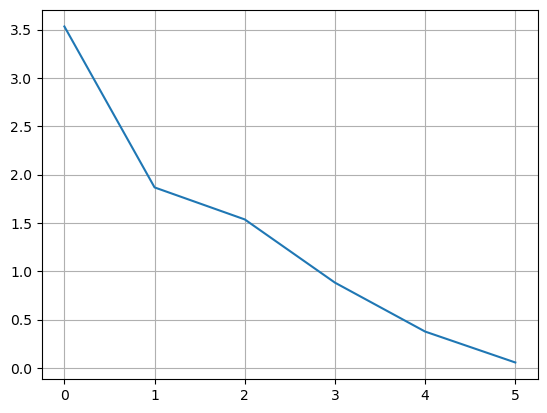

In [25]:
print(cost(A, y))
print(y.T)
print(A[1].T)
print(A[2].T)
print(A[3].T)

plt.grid()
plt.plot(np.arange(0, len(cost_vals)), cost_vals)

In [40]:
heights = [(28 * 28), 16, 16, 10]
A, W, B = generate_A_W_B(heights)

batch_size = 10
learning_rate = 1
train_size = 100
avg_cost = 0
avg_cost_arr = []
round_num = 1
total_rounds = 10

while round_num <= total_rounds and (round_num == 1 or avg_cost > 0.5):
    avg_cost = 0
    n = 0
    while n <= train_size - batch_size:
        dCdW_avg = []
        dCdB_avg = []
        for i in range(0, 3):
            dCdW_avg.append(np.zeros(W[i].shape))
            dCdB_avg.append(np.zeros(B[i].shape))

        for i in range(n, n + batch_size):
            A = setInputLayer(A, X_train[i])
            A = forward_propogation(A, W, B)
            avg_cost += cost(A, convertAnswer(y_train[i]))
            for j in range(0, 3):
                change = calcGradient(A, W, B, j)
                dCdW_avg[j] += change[0]
                dCdB_avg[j] += change[1]

        for i in range(0, 3):
            W[j] -= learning_rate * (dCdW_avg[j] / batch_size)
            B[j] -= learning_rate * (dCdB_avg[j] / batch_size)

        n += batch_size
        print('Progress ' + str(round_num) +': {0:.2f} %'.format(100 * n / train_size), end='\r' if n < train_size else '\t')

    avg_cost /= train_size
    avg_cost_arr.append(avg_cost)
    print('Average Cost ' + str(round_num) +': {0:.6f}'.format(avg_cost))
    round_num += 1


/tmp/ipykernel_1031/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Progress 1: 100.00 %	Average Cost 1: 2.194912
Progress 2: 100.00 %	Average Cost 2: 1.849459
Progress 3: 100.00 %	Average Cost 3: 1.856776
Progress 4: 100.00 %	Average Cost 4: 1.861489
Progress 5: 100.00 %	Average Cost 5: 1.864868
Progress 6: 100.00 %	Average Cost 6: 1.867450
Progress 7: 100.00 %	Average Cost 7: 1.869512
Progress 8: 100.00 %	Average Cost 8: 1.871209
Progress 9: 100.00 %	Average Cost 9: 1.872640
Progress 10: 100.00 %	Average Cost 10: 1.873868


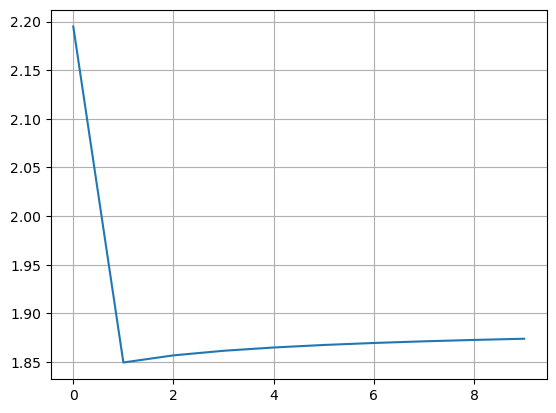

In [41]:
plt.grid()
plt.plot(np.arange(0, len(avg_cost_arr)), avg_cost_arr)

In [ ]:
def saveWB():
    for i in range(0, 3):
        with open('Weights/W_' + str(i) + '.csv', 'w+') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(W[i])
        with open('Biases/B_' + str(i) + '.csv', 'w+') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(B[i])

saveWB()

In [66]:
index = 6
A = setInputLayer(A, X_train[index])
A = forward_propogation(A, W, B)
y = convertAnswer(y_train[index])
print(cost(A, y))
print(y.T)
print(A[1].T)
print(A[2].T)
print(A[3].T)

TypeError: setInputLayer() takes 1 positional argument but 2 were given

---

#### Attempt at Generic Test Data (2 Hidden Layers)

In [61]:
def setInputLayer(A):
    A[0] = np.random.randint(2, size=len(A[0])).reshape(-1,1)
    return A

def convertAnswer(A):
    y = np.zeros((len(A[-1]), 1))
    y[sum(A[0])[0]] = 1
    return y


In [80]:
index = 5
heights = [10, 16, 16, 11]
A, W, B = generate_A_W_B(heights)
A = setInputLayer(A)
A = forward_propogation(A, W, B)
y = convertAnswer(A)

ct = 0
cost_vals = [cost(A, y)]
while cost_vals[-1] > 0.05 and ct < 10_000:
    W, B = backward_propogation(A, W, B)
    A = forward_propogation(A, W, B)
    cost_vals.append(cost(A, y))
    ct += 1

print(y.T)
print("Count: ", ct)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Count:  10


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0.18854223 0.04340248 0.03960056 0.17956663 0.00264147 0.98403093
  0.09412297 0.00924936 0.02606281 0.12113563 0.17628571]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0.12542604 0.11478129 0.02849534 0.16589259 0.0210175  0.9748303
  0.03205696 0.03052916 0.03068228 0.02760424 0.16930032]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0.16021853 0.09986696 0.02326146 0.23785498 0.01164694 0.97346016
  0.02511672 0.03226238 0.02754154 0.07535671 0.21569771]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0.18853949 0.07575122 0.03436502 0.20729086 0.00276684 0.98227569
  0.06075314 0.01190976 0.01547033 0.10422489 0.21020488]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0.09824716 0.07758411 0.07554539 0.13657536 0.00856302 0.98339876
  0.13702967 0.04122164 0.07546263 0.06834636 0.09286522]]


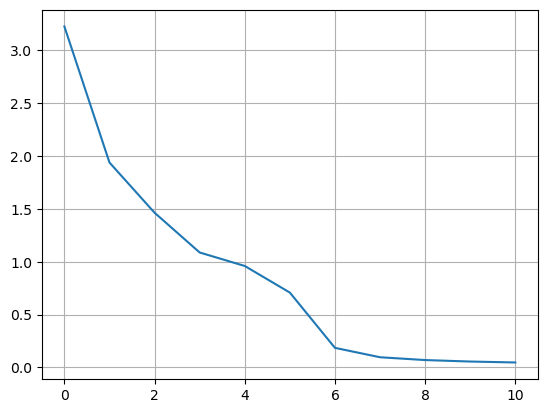

In [82]:
for _ in range(0, 5):
    A = setInputLayer(A)
    A = forward_propogation(A, W, B)
    y = convertAnswer(A)
    print(y.T)
    print(A[-1].T)


plt.grid()
plt.plot(np.arange(0, len(cost_vals)), cost_vals)

In [107]:
heights = [10, 16, 16, 11]
A, W, B = generate_A_W_B(heights)

for j in range(0, 3):
    print(j, W[j].shape, B[j].shape)

batch_size = 10
learning_rate = 0.1
train_size = 1000
avg_cost = 0
avg_cost_arr = []
round_num = 1
total_rounds = 10

while round_num <= total_rounds and (round_num == 1 or avg_cost > 0.5):
    avg_cost = 0
    n = 0
    while n <= train_size - batch_size:
        dCdW_avg = []
        dCdB_avg = []
        for i in range(0, 3):
            dCdW_avg.append(np.zeros(W[i].shape))
            dCdB_avg.append(np.zeros(B[i].shape))

        for i in range(n, n + batch_size):
            A = setInputLayer(A)
            A = forward_propogation(A, W, B)
            avg_cost += cost(A, convertAnswer(A))
            for j in range(0, 3):
                change = calcGradient(A, W, B, j)
                dCdW_avg[j] += change[0]
                dCdB_avg[j] += change[1]

        for i in range(0, 3):
            W[j] -= learning_rate * (dCdW_avg[j] / batch_size)
            B[j] -= learning_rate * (dCdB_avg[j] / batch_size)

        n += batch_size
        print('Progress ' + str(round_num) +': {0:.2f} %'.format(100 * n / train_size), end='\r' if n < train_size else '\t')

    avg_cost /= train_size
    avg_cost_arr.append(avg_cost)
    print('Average Cost ' + str(round_num) +': {0:.6f}'.format(avg_cost))
    round_num += 1


0 (16, 10) (16, 1)
1 (16, 16) (16, 1)
2 (11, 16) (11, 1)
Progress 1: 100.00 %	Average Cost 1: 1.501829
Progress 2: 100.00 %	Average Cost 2: 1.459492
Progress 3: 100.00 %	Average Cost 3: 1.424621
Progress 4: 100.00 %	Average Cost 4: 1.464239
Progress 5: 100.00 %	Average Cost 5: 1.423929
Progress 6: 100.00 %	Average Cost 6: 1.497892
Progress 7: 100.00 %	Average Cost 7: 1.425478
Progress 8: 100.00 %	Average Cost 8: 1.458215
Progress 9: 100.00 %	Average Cost 9: 1.448124
Progress 10: 100.00 %	Average Cost 10: 1.487070


In [108]:
for _ in range(0, 5):
    A = setInputLayer(A)
    A = forward_propogation(A, W, B)
    y = convertAnswer(A)
    print(y.T)
    print(A[-1].T)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0.01463999 0.01219063 0.02112908 0.02071302 0.01085903 0.98488135
  0.02506007 0.01722839 0.02037191 0.01600462 0.01891308]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0.01251753 0.00915854 0.00493176 0.01052531 0.00796682 0.99328133
  0.01237856 0.01560009 0.00902499 0.00827057 0.00921374]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.01169967 0.00584382 0.00737662 0.01018966 0.00861204 0.9925892
  0.0113241  0.01076393 0.0104748  0.00917672 0.00927079]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0.01530758 0.01030869 0.01372597 0.01582119 0.01976901 0.98113687
  0.01295681 0.00913808 0.00982596 0.01573419 0.01651791]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[0.01438675 0.01441724 0.0237757  0.01671823 0.01493995 0.98704652
  0.00836435 0.01769957 0.01468076 0.01604319 0.01137354]]
